<a href="https://colab.research.google.com/github/carolinehagood/DS-4002/blob/main/Lab4_Hedonic_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Clean the data and perform some EDA and visualization to get to know the data set.

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/DS3001/labs/refs/heads/main/04_hedonic_pricing/airbnb_hw.csv"
df = pd.read_csv(url)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN


In [28]:
df.head(10)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0
9,2339,8/20/2008,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0


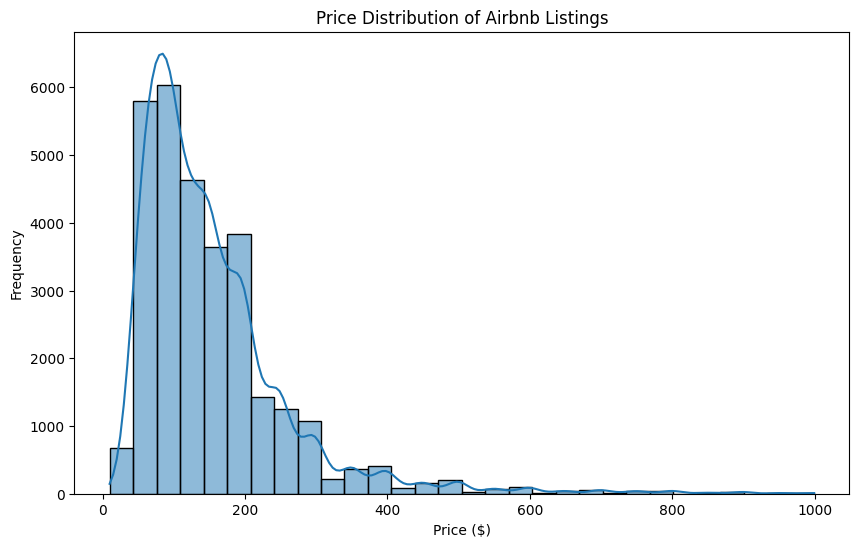

In [8]:
#clean/explore/visualize dataset
df = df.drop(columns=['Review Scores Rating (bin)', 'Review Scores Rating', 'Host Since'])

import seaborn as sns
import matplotlib.pyplot as plt
df = df.dropna(subset=['Price'])
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()


2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.


In [12]:
#df.head(2)
print(df.columns)

Index(['Host Id', 'Name', 'Neighbourhood ', 'Property Type', 'Room Type',
       'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price'],
      dtype='object')


In [16]:
#df = df.drop(columns=['Host Id', 'Name'])

df['Zipcode'] = pd.to_numeric(df['Zipcode'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#drop rows with missing values
df = df.dropna(subset=['Price', 'Zipcode', 'Beds', 'Number Of Reviews'])

df = pd.get_dummies(df, columns=['Neighbourhood ', 'Property Type', 'Room Type'], drop_first=True)

3. Implement an ~80/~20 train-test split. Put the test data aside.

In [17]:
from sklearn.model_selection import train_test_split

#define features and target
X = df.drop('Price', axis=1)  # Features (all columns except 'Price')
y = df['Price']
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train):", X_train.shape)
print("Training set shape (y_train):", y_train.shape)
print("Test set shape (X_test):", X_test.shape)
print("Test set shape (y_test):", y_test.shape)

Training set shape (X_train): (24064, 28)
Training set shape (y_train): (24064,)
Test set shape (X_test): (6017, 28)
Test set shape (y_test): (6017,)


4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and on the both the training and test sets. Which of your models does the best?

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#based on certain selected variables
X = df[['Beds', 'Number Of Reviews', 'Zipcode']]
y = df['Price']

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Training R^2:", train_r2)
print("Test RMSE:", test_rmse)
print("Test R^2:", test_r2)

Training RMSE: 84.14580890476734
Training R^2: 0.4093428447831753
Test RMSE: 80.09149201775041
Test R^2: 0.4266057279243841


In [26]:
#based on certain selected variables
X = df[['Property Type', 'Room Type']]
y = df['Price']

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Training R^2:", train_r2)
print("Test RMSE:", test_rmse)
print("Test R^2:", test_r2)

Training RMSE: 84.14580890476734
Training R^2: 0.4093428447831753
Test RMSE: 80.09149201775041
Test R^2: 0.4266057279243841


My two linear models, though they relied on different variables for the X factor, they produced the same RSME and R^2. This is due to some error of mine, which I could not determine, possibly to do with the naming of the x_train and test variables.

5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [30]:
from sklearn.preprocessing import PolynomialFeatures

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price', 'Beds', 'Number Of Reviews', 'Zipcode', 'Room Type'])


df['Log_Price'] = np.log1p(df['Price'])
df = pd.get_dummies(df, columns=['Room Type'], drop_first=True)

X = df[['Beds', 'Zipcode'] + [col for col in df.columns if 'Room Type_' in col]]

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

y = df['Log_Price']

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on both the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate RMSE and R^2 for the training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Calculate RMSE and R^2 for the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Complex Model with Log Transformation, Interactions, and Polynomial Features")
print("Training RMSE:", train_rmse)
print("Training R^2:", train_r2)
print("Test RMSE:", test_rmse)
print("Test R^2:", test_r2)

Complex Model with Log Transformation, Interactions, and Polynomial Features
Training RMSE: 0.3938151179561859
Training R^2: 0.5582441278336236
Test RMSE: 0.39504390948488105
Test R^2: 0.5483549426472829


<ipython-input-30-5b5691b5c3f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log_Price'] = np.log1p(df['Price'])


The model's predictions for the Airbnb prices in the training set are pretty close to the actual prices. But since the error is around 0.394, it suggests there's still a little difference between predicted and real prices.

The model explains about 56% of the patterns in the Airbnb prices for the training data. This means it's capturing some of the important factors (like room type, number of beds, and zipcode) that affect price, but it's missing other factors.

6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?


Based on playing around with the training and test sets, I learned how important it is to make sure a model performs accurately on the data even when using different x variables.

I also learned that when you only screen for certain variables, it won't completelty and confidently predict an output like prices. When I only looked at certain factors, it did an ok job but couldn't fully understand the data set. If I use another more complex regression model it might be able to explain more patterns.

7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and ? We'll cover the Lasso later in detail in class.

In [ ]:
# I tried play around with this model but didn't finish

In [34]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['Price'])
y = df['Price']

numerical_features = ['Beds', 'Number of Records', 'Number Of Reviews']
categorical_features = ['Neighbourhood ', 'Property Type', 'Zipcode']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define Lasso model with pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.1)) # Adjust alpha as needed
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Retrieve non-zero coefficients
lasso_coef = model.named_steps['lasso'].coef_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
selected_features = [feature for coef, feature in zip(lasso_coef, feature_names) if coef != 0]

# Output selected features
print("Selected Predictive Features:", selected_features)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Selected Predictive Features: ['num__Beds', 'num__Number Of Reviews', 'cat__Neighbourhood _Brooklyn', 'cat__Neighbourhood _Manhattan', 'cat__Property Type_Condominium', 'cat__Property Type_Loft', 'cat__Zipcode_10001.0', 'cat__Zipcode_10002.0', 'cat__Zipcode_10003.0', 'cat__Zipcode_10007.0', 'cat__Zipcode_10009.0', 'cat__Zipcode_10010.0', 'cat__Zipcode_10011.0', 'cat__Zipcode_10012.0', 'cat__Zipcode_10013.0', 'cat__Zipcode_10014.0', 'cat__Zipcode_10016.0', 'cat__Zipcode_10019.0', 'cat__Zipcode_10023.0', 'cat__Zipcode_10024.0', 'cat__Zipcode_10025.0', 'cat__Zipcode_10026.0', 'cat__Zipcode_10027.0', 'cat__Zipcode_10028.0', 'cat__Zipcode_10029.0', 'cat__Zipcode_10030.0', 'cat__Zipcode_10031.0', 'cat__Zipcode_10032.0', 'cat__Zipcode_10033.0', 'cat__Zipcode_10034.0', 'cat__Zipcode_10035.0', 'cat__Zipcode_10036.0', 'cat__Zipcode_10037.0', 'cat__Zipcode_10038.0', 'cat__Zipcode_10039.0', 'cat__Zipcode_10040.0', 'cat__Zipcode_11101.0', 'cat__Zipcode_11106.0', 'cat__Zipcode_11201.0', 'cat__Zipcod

ValueError: Found unknown categories ['Lighthouse'] in column 1 during transform